### Classification
Gaussian Naive Bayes Classifier
Load and prepare dataset

In [2]:
import pandas as pd
from sklearn.datasets import load_iris
from IPython.display import display
# Load the Iris dataset
iris = load_iris() 
# create new dataframe from iris data
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target
iris_df['species'] = iris_df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

display(iris_df.head())
X = iris_df[['sepal length (cm)',	'sepal width (cm)',	'petal length (cm)'	,'petal width (cm)']]  
y = iris_df['species']  # Target (species: 0=setosa, 1=versicolor, 2=virginica)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Split data into test and train dataset

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Train the GNB Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

### Make Predictions


In [5]:
# Make predictions
y_pred = gnb.predict(X_test)


### Evaluate the model

In [6]:
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", )
print(classification_report(y_test, y_pred))

Accuracy: 1.0

Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# Python 

## Loading and Displaying the Car Evaluation Dataset from UCI Repository

In [3]:
import pandas as pd

# URL of the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data"

# Load the dataset into a pandas DataFrame
columns = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "class"]
car_data = pd.read_csv(url, names=columns)

# Display the first few rows of the dataset
car_data.head()


,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


## Checking for Missing Values, Data Types, and Basic Statistics

In [4]:
# Check for missing values
print(car_data.isnull().sum())

# Display data types of each column
print(car_data.dtypes)

# Display basic statistics of the dataset
print(car_data.describe(include='all'))


buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64
buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
class       object
dtype: object
       buying  maint doors persons lug_boot safety  class
count    1728   1728  1728    1728     1728   1728   1728
unique      4      4     4       3        3      3      4
top     vhigh  vhigh     2       2    small    low  unacc
freq      432    432   432     576      576    576   1210


## Encoding Categorical Variables Using LabelEncoder

In [5]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each column
for column in car_data.columns:
    car_data[column] = label_encoder.fit_transform(car_data[column])

# Display the first few rows of the encoded dataset
car_data.head()


,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


## Separating Features and Target Variable, and Splitting the Data into Training and Test Sets

In [6]:
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = car_data.drop("class", axis=1)
y = car_data["class"]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the training and test sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(1382, 6) (346, 6) (1382,) (346,)


## Training the Gaussian Naive Bayes Model

In [7]:
from sklearn.naive_bayes import GaussianNB

# Initialize the Gaussian Naive Bayes model
gnb = GaussianNB()

# Train the model
gnb.fit(X_train, y_train)


GaussianNB()

## Evaluating the Model Performance

In [2]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict the target variable for the test data
y_pred = gnb.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Display the classification report with zero_division parameter
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=1))

# Display the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.6242774566473989
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.10      0.16        83
           1       1.00      0.00      0.00        11
           2       0.82      0.81      0.82       235
           3       0.17      1.00      0.30        17

    accuracy                           0.62       346
   macro avg       0.62      0.48      0.32       346
weighted avg       0.72      0.62      0.61       346

Confusion Matrix:
[[  8   0  38  37]
 [  3   0   3   5]
 [  5   0 191  39]
 [  0   0   0  17]]


## Car Evaluation Classification using Gaussian Naive Bayes

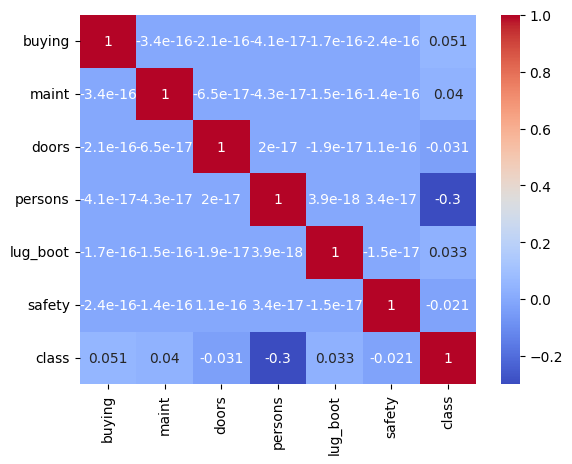

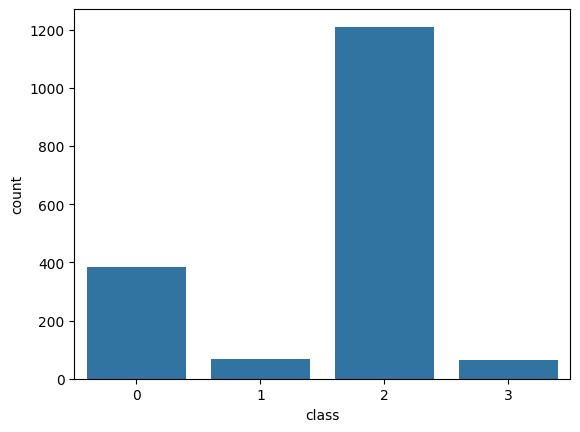

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data"
columns = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "class"]
car_data = pd.read_csv(url, names=columns)

# Encode categorical variables
label_encoder = LabelEncoder()
for column in car_data.columns:
    car_data[column] = label_encoder.fit_transform(car_data[column])

# Now, compute the correlation matrix
sns.heatmap(car_data.corr(), annot=True, cmap='coolwarm')
plt.show()

# Visualize the class distribution
sns.countplot(x='class', data=car_data)
plt.show()
